# Tourism in Japan and Japanese Hostels Analysis

## Lucas Mitchell

## Introduction

Japan is quickly becoming a popular tourist spot for people around the world, with an expected 40 million tourists in 2020. With the 2020 Summer Olympics being held in Tokyo, the tourism count will most likely surpass 40 million that year. Visiting Japan is also less expensive than other popular tourists spots, specifically those in Europe. Japan provides a more unique experience because of how vastly different the Eastern culture is. One way to experience this unique culture on a more personal level is to stay in a traditional hostel rather than a hotel. Due to the large influx of tourists during the Olympics, many of the hotels may be completely booked, but the plethora of Hostels may have more openings and provide a more unique experience.

For my analysis, I will be using two datasets obtained from Kaggle.com:

1) The amount of tourists for each year from 2003-2018

2) Ratings for over 300 hostels in five major Japanese cities (Tokyo, Kyoto, Osaka, Fukuoka, and Hiroshima)

These two datasets are very important with respect to data science, because by using linear regression on the 1st dataset we can make an accurate prediction on whether or not Japan will reach 40 million tourists in 2020. The 2nd dataset is important as well, because we can determine what makes a hostel better than its competitors and if there is any significance between different traits, such as cleanliness and atmosphere.

During my tutorial, I will go through the data science pipeline in these steps:

1) Data Collection

2) Data Visualization/Analysis

3) Hypothesis Testing and Machine Learning

4) Findings/Conclusion

In [150]:
#These are the python libraries that I will be using during my tutorial.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api
import numpy as np

# Dataset 1: Tourists in Japan

## Data Collection

In [56]:
#Import the dataset with read_csv and replace each comma so that the data can be used as ints
df = pd.read_csv("Japan_Tourist.csv", thousands=',')
df = df.drop("Index", axis=1) #Clip the unnecessary first column
df

,January,February,March,April,May,June,July,August,September,October,November,December,Year
0,2295668,2035771,2205664,2578970,2294717,2346442,2681518,2477428,2280406,2595148,2378079,2521262,2017
1,1851895,1891375,2009550,2081697,1893574,1985722,2296451,2049234,1918246,2135904,1875404,2050648,2016
2,1218393,1386982,1525879,1764691,1641734,1602198,1918356,1817023,1612208,1829265,1647550,1773130,2015
3,944009,880020,1050559,1231471,1097211,1055273,1270048,1109569,1099102,1271705,1168427,1236073,2014
4,668610,729460,857024,923017,875408,901066,1003032,906379,866966,928560,839891,864491,2013
5,681786,546451,676662,779481,667046,682932,847194,774239,658239,705848,648548,689679,2012
6,714099,679393,352676,295826,357783,432883,561489,546503,538727,615701,551571,572101,2011
7,640346,664982,709684,788212,721348,677064,878582,802725,717756,727278,634818,648380,2010
8,580673,408628,568586,626313,485713,424427,632722,679586,535544,655481,565089,626896,2009
9,711350,696326,731619,779909,736122,681563,825012,742022,641235,738832,553491,513354,2008


This dataset contains the total amount of tourists over the last 15 years in Japan separated by month. To make it more usable, I will conduct a simple sum() over every row to get the total amount of tourists for that year.

According to the Japanese National Tourism Organization, there were 31,191,856 foreign tourists that visited Japan in 2018 (https://web.archive.org/web/20160508231752/http://www.jnto.go.jp/jpn/news/data_info_listing/pdf/160420_monthly.pdf). We can use this information to create a better linear regression model to make a prediction on the amount of tourists to Japan in 2020. 

## Data Visualization/Analysis

In [ ]:
df = df.assign(Total=0) #Create a new Column 'Total'

#sum each row together and then subtract the year from that summation
df.loc[:,'Total'] = df.sum(axis=1)
for index, row in df.iterrows():
    df.at[index, 'Total'] = df.at[index, 'Total'] - df.at[index, 'Year']

x = df.Year.values #Get the Year values as an array
y = df.Total.values #Get the total tourist count values as an array

#Now we want to use the 2018 data, so we append it to the x and y declared above where x=2018 and y=31,191,856
#This data is obtained from the Japanese National Tourism Organization website.
x = np.append(x, [2018])
x = np.sort(x)
y = np.append(y, [31191856])
y = np.sort(y)

#Create a plot for total tourism count for the last 16 years, now including 2018
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.scatter(x, y) #Create a scatter plot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y) #Create a regression line of degree 1 and plot it
line = intercept + slope * x
plt.plot(x,y,'o',x,line)

#Label the axes
plt.xlabel('Year') 
plt.ylabel('Total Tourists')
df

After plotting the total number of tourists for each available year and fitting a regression line, we can see that a 1 degree polynomial is probably not the best fit, due to it's linear growth whereas the data appears to be growing exponentially. Instead, we want to use a higher degree polynomial of degree 2 or degree 3to predict the amount of tourists in the year 2020.

## Hypothesis Testing and Machine Learning

We want to test if a regression line of degree 2 or degree 3 will make a better predictor for future years, so we will make two different regression lines and compare.

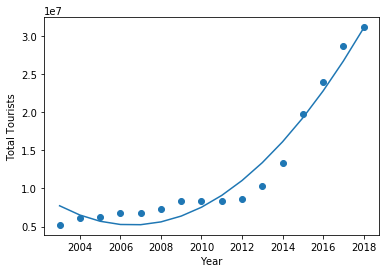

[ 7727758.94104004  6512049.32348633  5692349.61120605  5268659.80444336
  5240979.90319824  5609309.9074707   6373649.8170166   7533999.63220215
  9090359.3527832  11042728.97900391 13391108.51049805 16135497.94750977
 19275897.28991699 22812306.5378418  26744725.69116211 31073154.75      ]


In [81]:
#Test actual vs predicted for a regression line of degree 2
x = x.reshape(-1, 1) #Reshape the x values so they are usable
transformer2 = PolynomialFeatures(degree=2, include_bias=False) #Create a line of degree 2
transformer2.fit(x)
x2 = transformer2.transform(x) #Transform x, and then fit it to x
model2 = LinearRegression().fit(x2, y)
prediction2 = model2.predict(x2)
plt.scatter(x, y) #Plot the data with the new regression line of degree 2
plt.plot(x, prediction2)
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()
print(prediction2) #Lists the predicted values so that we can look at these versus the actual

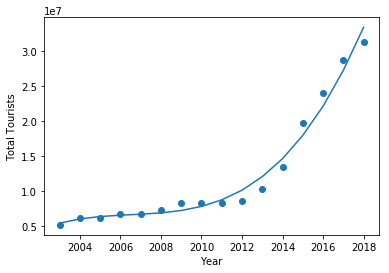

[ 5467138.484375  6059924.453125  6402829.109375  6595220.375
  6736465.96875   6925933.9375    7262992.125     7847008.328125
  8777350.5625   10153386.65625  12074484.40625  14640011.84375
 17949336.765625 22101827.015625 27196850.515625 33333775.15625 ]


In [82]:
#Test actual vs predicted for a linear regression of degree 3
transformer3 = PolynomialFeatures(degree=3, include_bias=False) #Create a line of degree 2
transformer3.fit(x)
x3 = transformer3.transform(x) #Transform x, and then fit it to x
model3 = LinearRegression().fit(x3, y)
prediction3 = model3.predict(x3)
plt.scatter(x, y) #Plot the data with the new regression line of degree 2
plt.plot(x, prediction3)
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()
print(prediction3)

Now that we have two regression lines, one of degree 2 and the other of degree 3, we want to test the loss function: (actual-predicted)^2 for each value. We will do this to determine which will be a better model for predicting the tourist count in 2020.

In [83]:
#Actual - predicted for regression line of degree 2:
l2 = (prediction2 - y) * (prediction2 - y)
l3 = (prediction3 - y) * (prediction3 - y)
print(sum(l3) > sum(l2))

False


Because the regression line of degree 3 has a lower (actual-predicted) values in total, that means it is a better fit for this graph. However because of it's potential for overfitting and causing higher variance, I opted to use the degree 2 regression line when looking at the projected tourism count in 2020.  

Now that we have decided to use the degree 2 regression line, we want to predict the number of tourists in the year 2020 and see if the Japanese government is en route to reach 40 million foreign tourists during that year.

In [85]:
X_predict = np.array([[2020]]) #create an array of size 1 of the value we like to test
transformer2.fit(X_predict)  #fit the x value we want to predict to the transformer created earlier
X_predict2 = transformer2.transform(X_predict)
prediction = model2.predict(X_predict2)
print(prediction)

[40918042.58398438]


Based on our linear regression model, it appears that Japan will receive 40.9 million tourists in 2020, which is slightly more than their expected. 

I also wanted to test what the predicted tourist count in 2020 would be if we instead used the 3rd degree regression line. This resulted in an estimated 49 million in 2020.


In [86]:
X_predict = np.array([[2020]]) #create an array of size 1 of the value we like to test
transformer3.fit(X_predict)  #fit the x value we want to predict to the transformer created earlier
X_predict2 = transformer3.transform(X_predict)
prediction = model3.predict(X_predict2)
print(prediction)

[49130799.390625]


By analyzing both of these regression lines, we can accurately assess that Japan will surpass 40 million tourists in the year 2020.

# Dataset 2: Japanese Hostels

# Data Collection

In [139]:
#Import the dataset with read_csv
df2 = pd.read_csv("Hostel.csv")
#Clip the unnecessary first column and the longitude and latitude columns
df2 = df2.drop("index", axis=1)
df2 = df2.drop("lon", axis=1)
df2 = df2.drop("lat", axis=1)
#Replace the "NA" information with np.NaN
df2 = df2.replace('NA', np.nan)
#We do not need the "km from city centre" for each distance, so we can drop those so that we can use the km as a floatdf2 = df2.replace('km from city centre', '')
df2.columns = ['Name', 'City', 'Price (yen)', 'Distance (km from city centre)', 'Score Summary', 'Rating', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 'Security', 'Staff', 'Value']
df2.head()

,Name,City,Price (yen),Distance (km from city centre),Score Summary,Rating,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4
1,& And Hostel,Fukuoka-City,2600,0.7,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5


After using pd.read_csv to collect the dataset from Kaggle.com, we tidy it by dropping unnecessary columns and by replacing 'NA' with np.NaN. We will not need longitude and latitude as I will not be doing any analysis on those two features.

In this DataFrame, Score Summary is the average rating for each of the other traits to the right of it in the DataFrame. This will be the primary indicator I use to determine which hostels are better than others.

## Data Visualization/Analysis

To start with visualizing the Hostels data, we will group the data by each city and then average the total scores and price for each hostel in that city together.

In [96]:
#Create a new DataFrame with only these specific columns
average = pd.DataFrame(columns = ['City', 'Score Summary', 'Price', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 'Security', 'Staff', 'Value',  'Count'])
#Iterate over the original DataFrame and add each point
for index, row in df2.iterrows():
    average.at[index, 'City'] = df2.at[index, 'City']
    average.at[index, 'Score Summary'] = df2.at[index, 'Score Summary']
    average.at[index, 'Price'] = df2.at[index, 'Price (yen)']
    average.at[index, 'Atmosphere'] = df2.at[index, 'Atmosphere']
    average.at[index, 'Cleanliness'] = df2.at[index, 'Cleanliness']
    average.at[index, 'Facilities'] = df2.at[index, 'Facilities']
    average.at[index, 'Location'] = df2.at[index, 'Location']
    average.at[index, 'Security'] = df2.at[index, 'Security']
    average.at[index, 'Staff'] = df2.at[index, 'Staff']
    average.at[index, 'Value'] = df2.at[index, 'Value']
    average.at[index, 'Count'] = 1    

average = average.groupby(['City']).sum() #Sum each column value together for each City and group

#Calculate the means by dividing each row by that rows total Hostel count
average['Price'] /= average['Count']
average['Score Summary'] /= average['Count']
average['Atmosphere'] /= average['Count']
average['Cleanliness'] /= average['Count']
average['Facilities'] /= average['Count']
average['Location'] /= average['Count']
average['Security'] /= average['Count']
average['Staff'] /= average['Count']
average['Value'] /= average['Count']

#Now convert to USD using the equivalent rate 1 JPY = .0092 USD from https://www.xe.com/currencyconverter/convert/?Amount=1&From=JPY&To=USD
average['Price'] *= .0092

#Reset the index so that we can use average['City'] in our plots
average = average.reset_index()
average

,City,Score Summary,Price,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Count
0,Fukuoka-City,8.115789,25.178947,7.889474,8.389474,7.963158,8.068421,8.121053,8.373684,8.036842,19
1,Hiroshima,9.171429,23.722857,8.535714,9.535714,8.785714,9.228571,9.371429,9.450000,9.242857,14
2,Kyoto,8.387179,21.101026,7.900000,8.746154,8.229487,8.315385,8.511538,8.580769,8.435897,78
3,Osaka,8.377885,22.071154,7.857692,8.501923,8.256731,8.313462,8.446154,8.802885,8.449038,104
4,Tokyo,8.376378,25.513701,7.805512,8.563780,8.161417,8.248031,8.645669,8.743307,8.461417,127


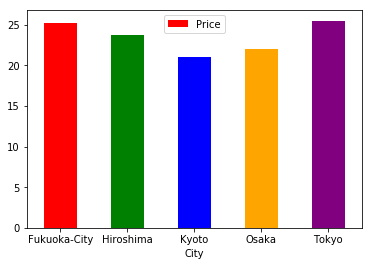

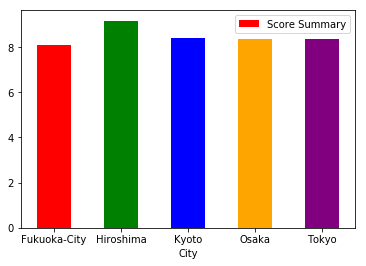

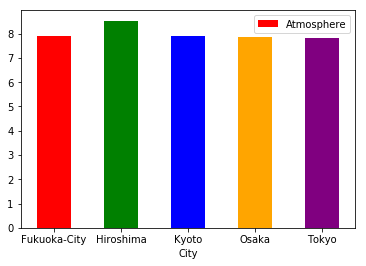

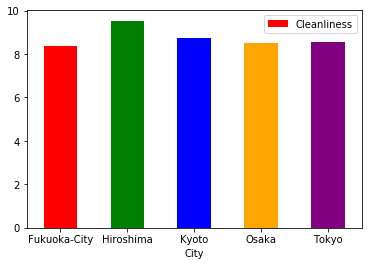

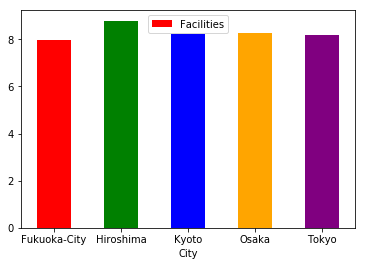

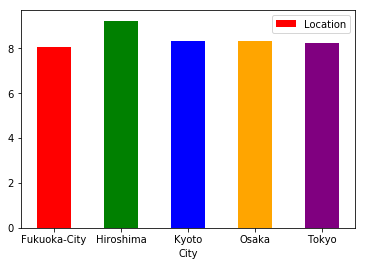

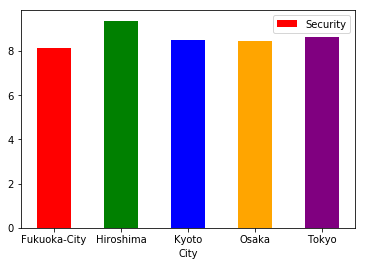

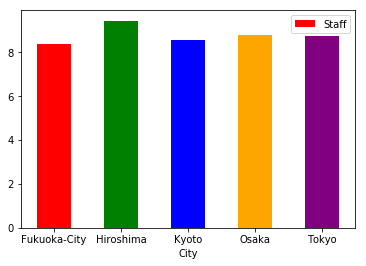

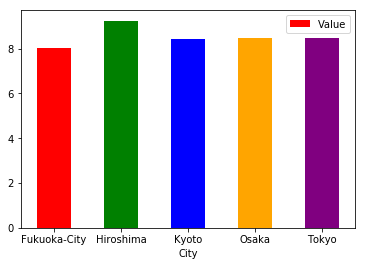

In [11]:
#Create a bar plot for each cities price, score, atmosphere, cleanliness, facilities, location, security, staff, and value
ax1 = average.plot.bar(x='City', y='Price', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
ax2 = average.plot.bar(x='City', y='Score Summary', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
ax3 = average.plot.bar(x='City', y='Atmosphere', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
ax4 = average.plot.bar(x='City', y='Cleanliness', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
ax5 = average.plot.bar(x='City', y='Facilities', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
ax6 = average.plot.bar(x='City', y='Location', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
ax7 = average.plot.bar(x='City', y='Security', rot=0, color=['red', 'green', 'blue', 'orange', 'purple']) 
ax8 = average.plot.bar(x='City', y='Staff', rot=0, color=['red', 'green', 'blue', 'orange', 'purple']) 
ax9 = average.plot.bar(x='City', y='Value', rot=0, color=['red', 'green', 'blue', 'orange', 'purple']) 

These 9 bar graphs help us to visualize which cities have the highest ratings or price in each of the 9 ranking categories. If something like security and atmosphere is important to you, then you can see which of the five cities is the highest ranking in those two categories and determine which city you would most likely to visit during your trip.

However, this data is not super helpful due to the skew of some cities having many more hostels than others. For example, Tokyo has over 100 more than Hiroshima, but Hiroshima is consistently number 1 in these plots. It would be better to plot each hostel individually and then someone would be able to see which hostel to consider based on their preferences.

So we can condense the information of each hostel for each city into different graphs, making it easier to visualize for someone trying to determine which hostel meets their needs most appropriately. A graph like this is easier to visualize than looking through a website at each possible hostel to find the one that meets their needs.

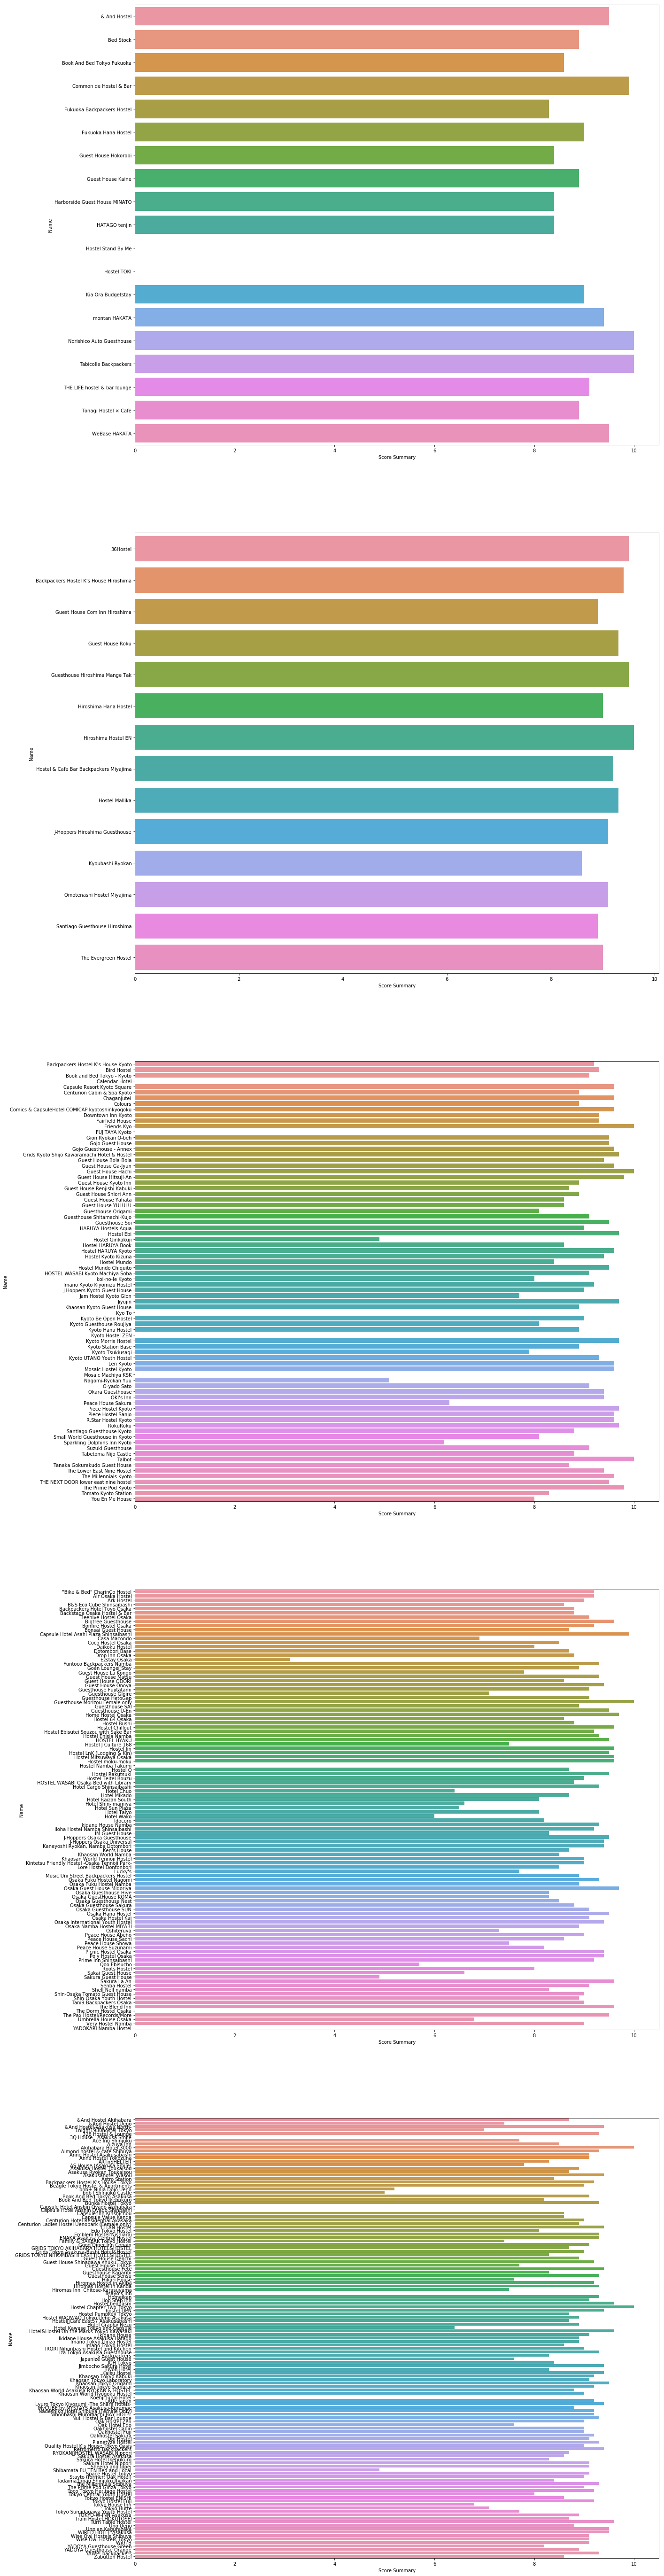

In [87]:
#Create 5 new DataFrames, one for each city
fukuoka = df2[(df2['City'] == 'Fukuoka-City')]
hiroshima = df2[(df2['City'] == 'Hiroshima')]
kyoto = df2[(df2['City'] == 'Kyoto')]
osaka = df2[(df2['City'] == 'Osaka')]
tokyo = df2[(df2['City'] == 'Tokyo')]

#Use seaborn to create a horizontal barplot for each new DataFrame
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(20, 100))
ax1 = sns.barplot(ax=ax1, orient='h', y='Name', x='Score Summary', data=fukuoka)
ax2 = sns.barplot(ax=ax2, orient='h', y='Name', x='Score Summary', data=hiroshima)
ax3 = sns.barplot(ax=ax3, orient='h', y='Name', x='Score Summary', data=kyoto)
ax4 = sns.barplot(ax=ax4, orient='h', y='Name', x='Score Summary', data=osaka)
ax5 = sns.barplot(ax=ax5, orient='h', y='Name', x='Score Summary', data=tokyo)

These horizontal bar graphs provide an easier way to visualize how the hostels are ranked against each other then looking through the DataFrame itself.

## Hypothesis Testing and Machine Learning

Now I would like to propse and analyze two new questions: 

1) Are hostels located closer to their city's center rated higher? Or are the ones further away better?

2) Are cheaper or more expensive hostels rated higher?

I will conduct these two tests by plotting two scatterplots with seaborn.scatterplot() and then by conducting a p-test using statsmodels to determine if I can reject or accept the Null Hypothesis.

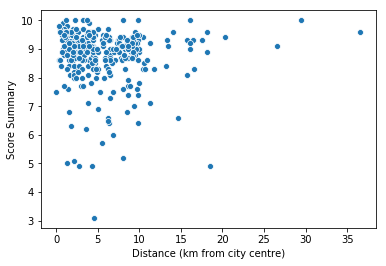

In [97]:
#Create a new scatterplot of distance vs. score summary for each hostel
dist = sns.scatterplot(x='Distance (km from city centre)', y='Score Summary', data=df2)

This graph does not look like there is a statistical significance between distance from the city centre and the score of the hostel, but let's conduct some statistical analysis anyways.
Suppose the null hypothesis is that there is no statistical significance between score and distance: do we reject or accept?

In [89]:
#Obtain the results by using statsmodels.formula.api.ols on x=Distance from city and y=Score Summary
x = df2.loc[:,'Distance (km from city centre)'].values
y = df2.loc[:,'Score Summary'].values
x = x.reshape(-1,1)
results = statsmodels.formula.api.ols(formula="x ~ y", data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1496
Date:                Fri, 19 Jul 2019   Prob (F-statistic):              0.699
Time:                        16:39:21   Log-Likelihood:                -963.12
No. Observations:                 327   AIC:                             1930.
Df Residuals:                     325   BIC:                             1938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6745      2.350      2.840      0.0

Because the p-value of y is greater than .05, we fail to reject the Null Hypothesis, meaning there is no statistical significance between Distance from the city centre and Price.

Now let's take a look at  Price vs. Score:

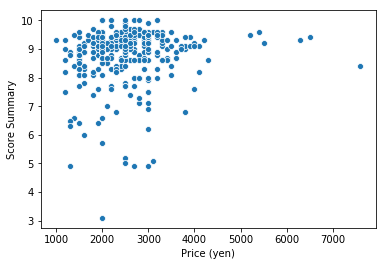

In [90]:
price = sns.scatterplot(x='Price (yen)', y='Score Summary', data=df2)

At a glance, there appears to be no statistical significance between Price and Score, but let's do a statistical analysis just in case. 
Do higher priced hostels have better scores or is the inverse true?
Suppose the null hypothesis is that there is no statistical significance between score and price: do we reject or accept?

In [91]:
x = df2.loc[:,'Price (yen)'].values
x = x.reshape(-1,1)
results = statsmodels.formula.api.ols(formula="x ~ y", data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.517
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0343
Time:                        16:39:21   Log-Likelihood:                -2654.9
No. Observations:                 327   AIC:                             5314.
Df Residuals:                     325   BIC:                             5321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1619.5901    414.980      3.903      0.0

Because the p-value of y is greater than .05, we fail to reject the Null Hypothesis, meaning there is no statistical significance between Score and Price.

I conducted the two tests done above because price and distance from the city center were not added in to the calculation of the Summary Score, so I wanted to determine if they had any impact on a hostel's overall Score.

The other seven traits: Atmosphere, Cleanliness, Facilities, Location, Security, Staff, and Value were all used to calculate the Score Summary so it is obvious that those heavily correlate to a hostel's overall Score.

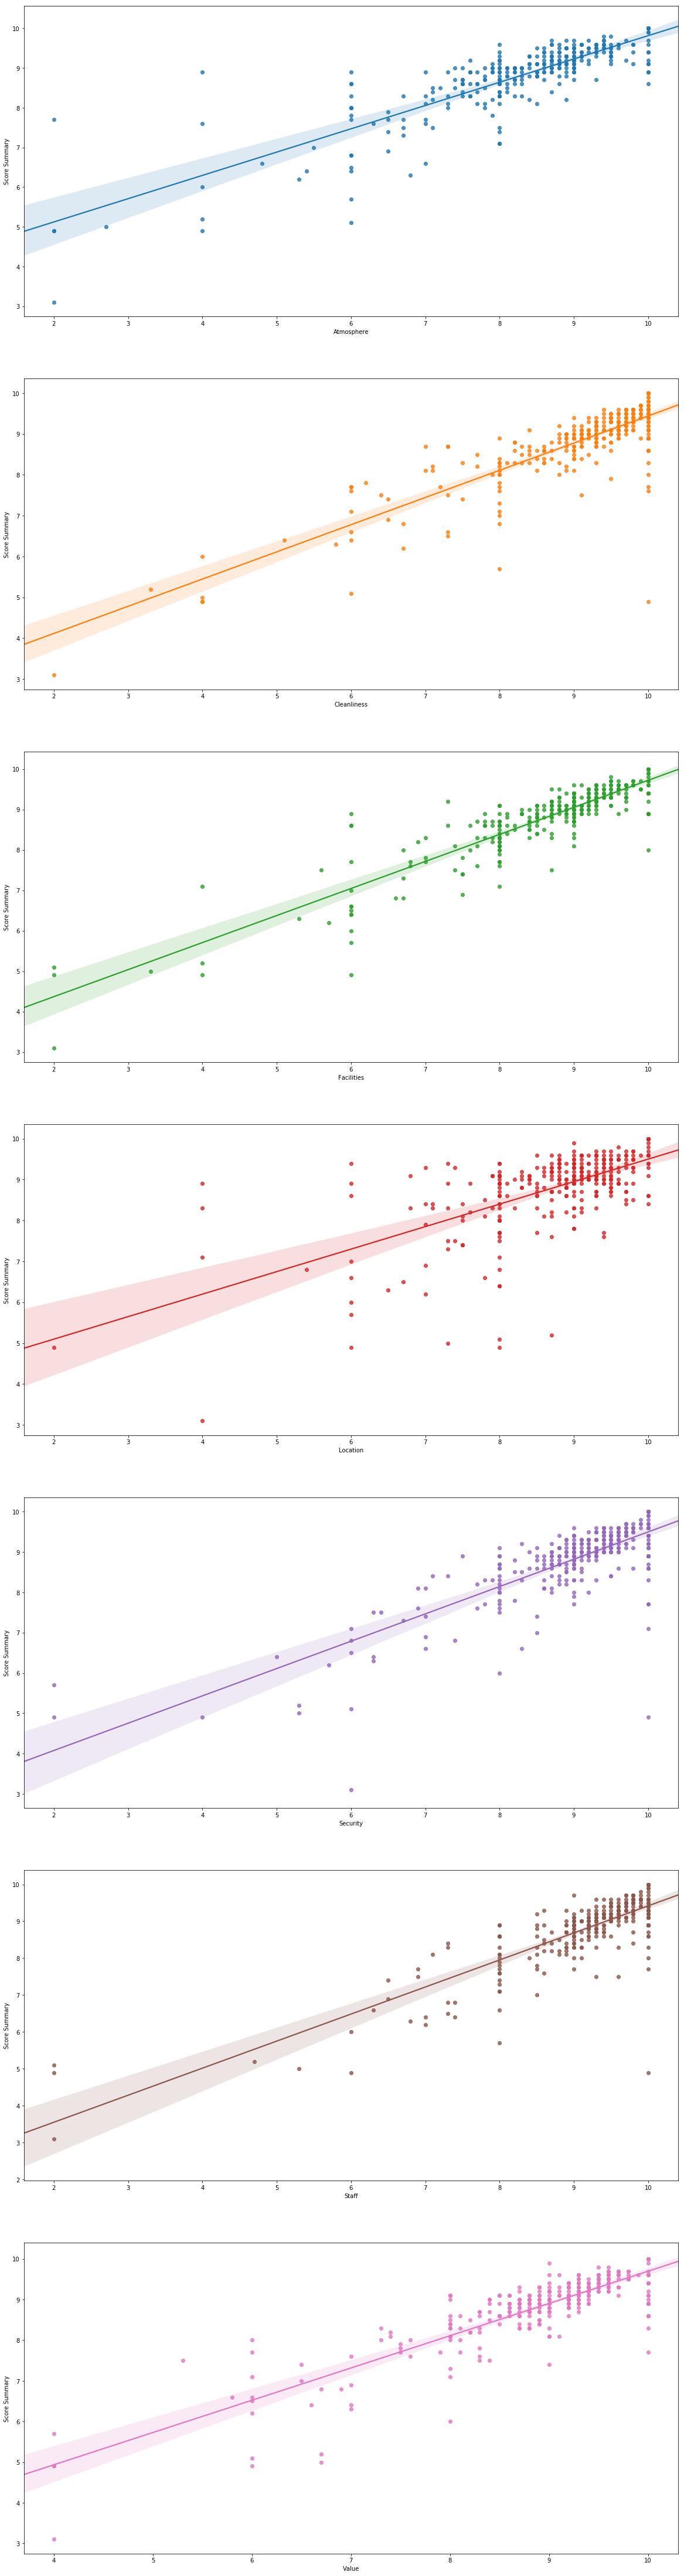

In [98]:
#Create 7 subplots
fig, axs = plt.subplots(7, figsize=(20, 80))
y = df2.loc[:, 'Score Summary'].values

#Create a regplot with seaborn for each of the seven traits: Atmosphere, Cleanliness, Facilities, Location, Security, Staff, and Value 
axs[0] = sns.regplot(ax=axs[0], x='Atmosphere', y='Score Summary', data=df2)
axs[1] = sns.regplot(ax=axs[1], x='Cleanliness', y='Score Summary', data=df2)
axs[2] = sns.regplot(ax=axs[2], x='Facilities', y='Score Summary', data=df2)
axs[3] = sns.regplot(ax=axs[3], x='Location', y='Score Summary', data=df2)
axs[4] = sns.regplot(ax=axs[4], x='Security', y='Score Summary', data=df2)
axs[5] = sns.regplot(ax=axs[5], x='Staff', y='Score Summary', data=df2)
axs[6] = sns.regplot(ax=axs[6], x='Value', y='Score Summary', data=df2)

Creating a violinplot and a boxplot with seaborn would be more helpful in visualizing the spread of each city's total scores.

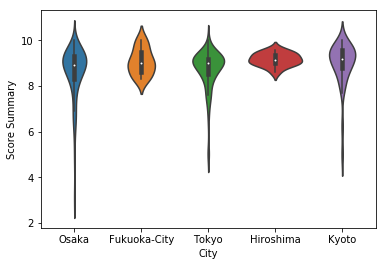

In [148]:
sns.violinplot(x='City', y='Score Summary', data=df2)

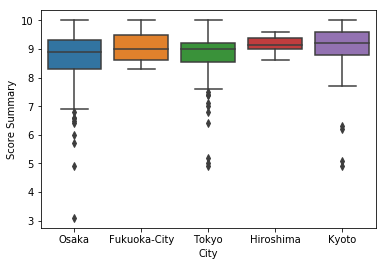

In [149]:
sns.boxplot(x='City', y='Score Summary', data=df2)

These two plots show that the majority of each city's hostels lie between an 8 to 9 score. Considering the dataset we used has 104 hostels from Osaka, this boxplot impressively shows that the majority of hostels in Osaka are highly ranked.

# Conclusion

In the first part of my project, I found that Japan is on track to reach it's goal of 40 million tourists in 2020 by using two linear regression models of degree 2 and degree 3. This is helpful information that could be better structured with the new 2019 data and could be used to continue to make predictions for future years.

In the second part of my project, I found that a hostel's overall score is directly correlated with the traits: Atmosphere, Cleanliness, Facilities, Location, Security, Staff, and Value, but is not at all correlated to its price or distance from the city center. This is important to determine because it implies that the best hostels are not the more expensive ones, meaning one's trip to Japan could be done at a lower budget than maybe first assumed. Also, because a hostel's score does not correlate directly to it's distance to the city center, one can room in a hostel further away from the city center and still have a wonderful experience; and due to Japan's world-renowned public transportation system, travelling into the city would be very easy.

Because this project only focused on the five cities contained in the available dataset, some further research that would be interesting to explore would be if hostels in certain regions of Japan, perhaps those in the Northern region or those on the coast, would be ranked differently from each other on average.

Overall, this project is helpful in determining what makes a hostel so great, and it turns out that it is exactly what would be expected: service quality, superior staff, and an ambient atmosphere to name a few.